In [2]:
# Week 2 - Step 1: Data Preprocessing

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("city_day.csv")

# 1. Drop column with too many missing values
df = df.drop(columns=["Xylene"])

# 2. Fill missing values with median (for numeric columns)
df = df.fillna(df.median(numeric_only=True))

# 3. Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# 4. Drop rows where AQI_Bucket is missing
df = df.dropna(subset=["AQI_Bucket"])

# 5. Encode City (convert names → numbers)
le_city = LabelEncoder()
df["City"] = le_city.fit_transform(df["City"])

# 6. Encode AQI_Bucket (Target variable)
le_bucket = LabelEncoder()
df["AQI_Bucket"] = le_bucket.fit_transform(df["AQI_Bucket"])

print("✅ Preprocessing Done!")
print("\nFirst 5 rows after preprocessing:\n", df.head())


✅ Preprocessing Done!

First 5 rows after preprocessing:
     City       Date   PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2  \
28     0 2015-01-29   83.13  95.68   6.93  28.71  33.72  15.85   6.93  49.52   
29     0 2015-01-30   79.84  95.68  13.85  28.68  41.08  15.85  13.85  48.49   
30     0 2015-01-31   94.52  95.68  24.39  32.66  52.61  15.85  24.39  67.39   
31     0 2015-02-01  135.99  95.68  43.48  42.08  84.57  15.85  43.48  75.23   
32     0 2015-02-02  178.33  95.68  54.56  35.31  72.80  15.85  54.56  55.04   

        O3  Benzene  Toluene    AQI  AQI_Bucket  
28   59.76     0.02     0.00  209.0           2  
29   97.07     0.04     0.00  328.0           5  
30  111.33     0.24     0.01  514.0           4  
31  102.70     0.40     0.04  782.0           4  
32  107.38     0.46     0.06  914.0           4  


In [4]:
# Step 2 - Feature Selection

# Features (independent variables)
X = df.drop(columns=["AQI_Bucket", "Date"])

# Target (dependent variable)
y = df["AQI_Bucket"]

print("✅ Feature Selection Done!")
print("Features Shape:", X.shape)
print("Target Shape:", y.shape)


✅ Feature Selection Done!
Features Shape: (24850, 13)
Target Shape: (24850,)


In [5]:
# Step 3 - Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Train-Test Split Done!")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


✅ Train-Test Split Done!
Training set shape: (19880, 13)
Testing set shape: (4970, 13)


In [6]:
# Step 4 - Train & Test ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

results = {}

for name, model in models.items():
    print(f"\n----- {name} -----")
    model.fit(X_train, y_train)  # Training
    preds = model.predict(X_test)  # Testing
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"Accuracy: {acc:.2f}")
    print("Classification Report:\n", classification_report(y_test, preds))



----- Logistic Regression -----


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.07      0.12       268
           1       0.78      0.81      0.79      1766
           2       0.47      0.38      0.42       556
           3       0.78      0.87      0.82      1645
           4       0.58      0.66      0.62       268
           5       0.58      0.61      0.60       467

    accuracy                           0.72      4970
   macro avg       0.60      0.57      0.56      4970
weighted avg       0.70      0.72      0.70      4970


----- Decision Tree -----
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00      1766
           2       1.00      1.00      1.00       556
           3       1.00      1.00      1.00      1645
           4       1.00      1.00      1.00       268
           5       1.00    

/tmp/ipython-input-2339695143.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


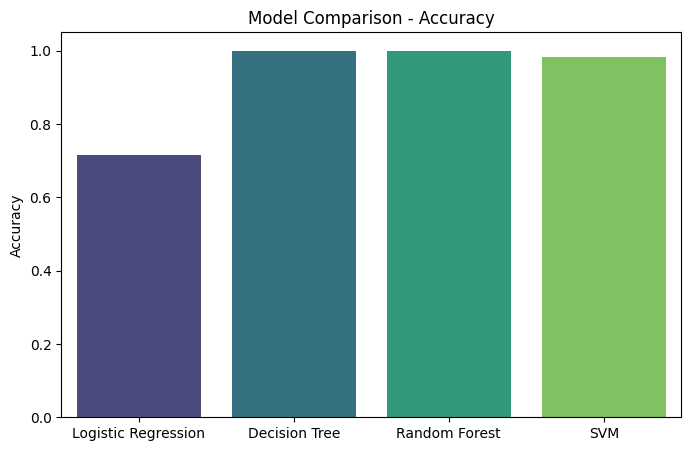

In [7]:
# Step 5 - Compare Model Accuracies
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0,1.05)
plt.show()
